In [2]:
import pandas as pd
import numpy as np
import copy

In [3]:
dataset = pd.read_csv("dataset SR.csv")

In [4]:
print(dataset.columns)

Index(['doi', 'k', 'T', 'c', 'salt', 'c units', 'solvent ratio type', 'EC',
       'PC', 'DMC', 'EMC', 'DEC', 'DME', 'DMSO', 'AN', 'MOEMC', 'TFP', 'EA',
       'MA', 'FEC', 'DOL', '2-MeTHF', 'DMM', 'Freon 11', 'Methylene chloride',
       'THF', 'Toluene', 'Sulfolane', '2-Glyme', '3-Glyme', '4-Glyme',
       '3-Me-2-Oxazolidinone', '3-MeSulfolane', 'Ethyldiglyme', 'DMF',
       'Ethylbenzene', 'Ethylmonoglyme', 'Benzene', 'g-Butyrolactone',
       'Cumene', 'Propylsulfone', 'Pseudocumeme', 'TEOS', 'm-Xylene',
       'o-Xylene'],
      dtype='object')


# Molar weights, salts etc

In [331]:
molar_weights = {'EC': 88.06,
       'PC' : 102.08, 'DMC' : 90.08,'EMC' : 104.10, 'DEC' : 118.132,
        'DME' : 90.12, 'DMSO' : 78.13, 'AN': 41.05, 'MOEMC': 134.13, 'TFP': 344.07, 'EA' : 88.10,
       'MA': 74.08, 'FEC': 106.05, 'DOL': 74.08, '2-MeTHF' : 86.13, 'DMM': 162.2, 'Freon 11' : 137.36,
       'Methylene chloride' : 84.93,
       'THF' : 72.10, 'Toluene' : 92.14, 'Sulfolane' : 120.17, '2-Glyme' : 134.17, '3-Glyme' : 178.22,
                 '4-Glyme' : 222.28,
       '3-Me-2-Oxazolidinone' : 101.10, '3-MeSulfolane' : 134.20, 'Ethyldiglyme': 134.17, 'DMF' : 73.09,
       'Ethylbenzene' : 106.17, 'Ethylmonoglyme' : 76.10, 'Benzene' : 78.11, 'g-Butyrolactone' : 86.09,
       'Cumene' : 120.19, 'Propylsulfone' : 150.24, 'Pseudocumeme' : 120.19, 'TEOS' : 208.33, 'm-Xylene' : 106.17,
       'o-Xylene' : 106.16} # Molar weights of different organic solvents  [g / mol]
molar_weights_salts = {'LiPF6' : 151.91, 'LiBF4': 93.75,
                      'LiFSI': 187.7, 'LiTDI' : 192.1, 'LiPDI' : 242.1, 'LiTFSI' : 287.07, 'LiClO4' : 160.44, 'LiAsF6' : 195.9,
 'LiBOB' : 193.79, 'LiCF3SO3' : 156.01, 'LiBPFPB' : 193.8, 'LiBMB': 221.85, 'LiN(CF3SO2)2' : 287.07} # Molar weights of salts in [g / mol]. Note that LiClO4 exists in hydrous and anyhydrous form
# Note that the weight of LiBMB was calculated theoretically
names_salts = {'LiPF6' : "Lithium hexafluorophosphate", 'LiBF4': "Lithium tetrafluoroborate",
                      'LiFSI': "Lithium Bis(fluorosulfonyl)imide", 'LiTDI' : "lithium 2-trifluoromethyl-4,5-dicyanoimidazole", 
               'LiPDI' : "lithium 4,5-dicyano-2-(pentafluoroethyl)imidazolide", 'LiTFSI': "Lithium bis(trifluoromethanesulfonyl)imide", 
               'LiClO4' : "Lithium perchlorate", 'LiAsF6' : "Lithium hexafluoroarsenate(V)",
 'LiBOB' : "Lithium bis(oxalato)borate", 'LiCF3SO3' : "Lithium triflate", 'LiBPFPB' : "Lithium bis(oxalate)borate",
               'LiBMB' : "lithium bis(malonato)borate", 'LiN(CF3SO2)2' : "lithium bis(trifluoromethanesulfonimide)"}

names_solvents = {'EC' : "Ethylene carbonate",
       'PC' : "Propylene carbonate", 'DMC' : "Dimethyl carbonate", 'EMC' : "Ethyl Methyl Carbonate", 
         'DEC' : "​Diethyl carbonate", 'DME' : "Dimethoxyethane", 'DMSO' : "Dimethyl sulfoxide", 'AN' : "Acetonitrile", 'MOEMC' : "2-Methoxyethyl (methyl) carbonate",
         'TFP' : "Tris(2,2,2-trifluoroethyl) phosphate", 'EA' : "Ethyl acetate",
       'MA' : "Methyl acetate", 'FEC' : "Fluoroethylene carbonate", 'DOL': "Dioxolane"
         , '2-MeTHF': "2-Methyltetrahydrofuran", 'DMM' : "Dipropylene glycol dimethyl ether",
         'Freon 11' : "Trichlorofluoromethane", 'Methylene chloride' : 'Methylene chloride',
       'THF' : "Tetrahydrofuran", 'Toluene' : "Toluene", 'Sulfolane' : "Sulfolane",
         '2-Glyme': "Diglyme", '3-Glyme': "Triglyme", '4-Glyme': "tetraglyme",
       '3-Me-2-Oxazolidinone' : "3-Me-2-Oxazolidinone", '3-MeSulfolane' : "3-Methylsulfolane",
         'Ethyldiglyme' : "2-(2-Ethoxyethoxy)ethanol", 'DMF' : "Dimethylformamide",
       'Ethylbenzene': 'Ethylbenzene', 'Ethylmonoglyme': "ethylene glycol monomethyl", 'Benzene' : "Benzene", 'g-Butyrolactone' : "gamma-Butyrolactone",
       'Cumene' : "Cumene", 'Propylsulfone' : 'Propylsulfone', 'Pseudocumeme' : "1,2,4-Trimethylbenzene", 'TEOS' : "Tetraethyl orthosilicate", 'm-Xylene' : 'm-Xylene',
       'o-Xylene' : 'o-Xylene'
}

densities = {'EC': 1.3210,
       'PC' : 1.205, 'DMC' : 1.07, 'EMC' : 0.902, 'DEC' : 0.975,
        'DME' : 0.86, 'DMSO' : 1.1004, 'AN': 0.786, 'MOEMC': 1.5, 'TFP': 1.487, 'EA' : 0.902,
       'MA': 0.932, 'FEC': 1.454, 'DOL': 1.06, '2-MeTHF' : 0.854, 'DMM': 0.902, 'Freon 11': 1.49, 'Methylene chloride': 1.33,
       'THF': 0.888, 'Toluene' : 0.867, 'Sulfolane' : 1.26, '2-Glyme': 0.937, '3-Glyme': 0.986, '4-Glyme': 1.009,
       '3-Me-2-Oxazolidinone': 1.17, '3-MeSulfolane': 1.20, 'Ethyldiglyme' : 0.937, 'DMF': 0.944,
       'Ethylbenzene': 0.866, 'Ethylmonoglyme': 0.965, 'Benzene': 0.876, 'g-Butyrolactone' : 1.13,
       'Cumene': 0.862, 'Propylsulfone' : 1.109, 'Pseudocumeme': 0.876, 'TEOS': 0.940, 'm-Xylene' : 0.860,
       'o-Xylene': 0.87596} # g / cm3 at 25 C


# Converting weights to molar ratios

In this case, for each of the solvents, we want it such that the value of each row corresponds to how many moles of each are in 1 kg of total solvent 

In [332]:
def transform_mole_to_liter(df, molar_weights, densities):
    '''
        Function that transforms a df with molar weights in one kg, into how much
        volume is occupied in the mixture. This assumes that the volume of mixed
        liquids depends on the average of their density 

        Returns the volume of each compositon in [l]
    '''
    copied_df = copy.copy(df)

    # Transform moles into g of 
    for column in copied_df.columns:
        if column in molar_weights:
            copied_df[column] *= molar_weights[column]

    # Now each column is divided by the density
    for column in copied_df.columns:
        if column in densities:
            copied_df[column] *= 1 / (densities[column] * 1000)
    total_volumes = copied_df.iloc[:,7:].sum(axis=1)
    return total_volumes

In [333]:
copied_dataset = copy.copy(dataset)

# Extracting all columns, where the solvent ratios are given by their weights, molarity and volumes
solvent_ratio_w = copied_dataset[copied_dataset['solvent ratio type'] == 'w']
solvent_ratio_m_o = copied_dataset[copied_dataset['solvent ratio type'] == 'mol']
solvent_ratio_m = copied_dataset[copied_dataset['solvent ratio type'] == 'mol']
solvent_ratio_v = copied_dataset[copied_dataset['solvent ratio type'] == 'v']

# Transforming solvent weight ratios to how many moles in one kg of solvent
for column in solvent_ratio_w.columns:
    if column in molar_weights:
        solvent_ratio_w[column] *= 1000 / molar_weights[column] # Turn it into mol in one kg of solvent

# Transforming solven molar ratios to how many moles in one kg of solvent

for column in solvent_ratio_m.columns:
    if column in molar_weights:
        solvent_ratio_m[column] *= molar_weights[column]

row_sums = 1000 / solvent_ratio_m.iloc[:, 7:].sum(axis=1).values # Sum of molar fraction times the molar weight

# Divide each row by 1000 divided by the sum of that row
normalized_df_m = solvent_ratio_m_o.iloc[:, 7:].mul(row_sums, axis=0)
solvent_ratio_m_o.iloc[:, 7:] = normalized_df_m # Now in each row for the solvents, we have the number of moles per kg of solvent

# The question now is, how much volume does a solvent like this occupy

volumes = transform_mole_to_liter(solvent_ratio_m_o, 
                                  molar_weights,
                                  densities)





<ipython-input-333-3c9ea327e744>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solvent_ratio_w[column] *= 1000 / molar_weights[column] # Turn it into mol in one kg of solvent
<ipython-input-333-3c9ea327e744>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solvent_ratio_m[column] *= molar_weights[column]
<ipython-input-333-3c9ea327e744>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

(array([ 29.,   0., 620., 140.,   0.,   0.,   0.,   0., 367.,  25.]),
 array([0.66666667, 0.72722646, 0.78778626, 0.84834606, 0.90890585,
        0.96946565, 1.03002545, 1.09058524, 1.15114504, 1.21170483,
        1.27226463]),
 <BarContainer object of 10 artists>)

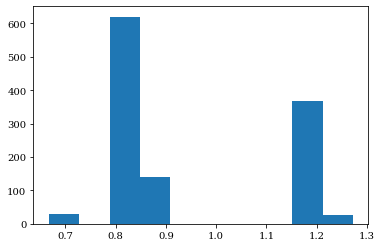

In [337]:
import matplotlib.pyplot as plt 
plt.hist(volumes.values, bins=10)

In [330]:
solvent_ratio_m_o

,doi,k,T,c,salt,c units,solvent ratio type,EC,PC,DMC,...,Ethylbenzene,Ethylmonoglyme,Benzene,g-Butyrolactone,Cumene,Propylsulfone,Pseudocumeme,TEOS,m-Xylene,o-Xylene
130,10.1016/j.jpowsour.2011.07.071,5.037117,260.912465,1.0,LiPF6,mol/l,mol,5.613562,0.0,5.613562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,10.1016/j.jpowsour.2011.07.071,5.194092,261.679555,1.0,LiPF6,mol/l,mol,5.613562,0.0,5.613562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,10.1016/j.jpowsour.2011.07.071,5.247448,262.137334,1.0,LiPF6,mol/l,mol,5.613562,0.0,5.613562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,10.1016/j.jpowsour.2011.07.071,5.353387,262.901330,1.0,LiPF6,mol/l,mol,5.613562,0.0,5.613562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,10.1016/j.jpowsour.2011.07.071,5.457006,263.210640,1.0,LiPF6,mol/l,mol,5.613562,0.0,5.613562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,10.1149/1.1527939,2.199510,228.434917,1.2,LiBOB,mol/l,mol,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5650,10.1149/1.1527939,1.728628,223.393383,1.2,LiBOB,mol/l,mol,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5651,10.1149/1.1527939,1.249148,219.195667,1.2,LiBOB,mol/l,mol,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5652,10.1149/1.1527939,0.891675,213.679275,1.2,LiBOB,mol/l,mol,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
(solvent_ratio_w['c units'] == "mol/kg").sum() # Most measurements of the salt are in mol / kg

10589

In [139]:
solvent_ratio_w

,doi,k,T,c,salt,c units,solvent ratio type,EC,PC,DMC,...,Ethylbenzene,Ethylmonoglyme,Benzene,g-Butyrolactone,Cumene,Propylsulfone,Pseudocumeme,TEOS,m-Xylene,o-Xylene
0,10.1007/s10008-002-0300-9,0.160643,333.235034,1.0,LiPF6,mol/kg,w,3.747445,0.0,3.66341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.1007/s10008-002-0300-9,0.150856,322.764924,1.0,LiPF6,mol/kg,w,3.747445,0.0,3.66341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.1007/s10008-002-0300-9,0.141666,313.801722,1.0,LiPF6,mol/kg,w,3.747445,0.0,3.66341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.1007/s10008-002-0300-9,0.132277,303.681806,1.0,LiPF6,mol/kg,w,3.747445,0.0,3.66341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.1007/s10008-002-0300-9,0.119348,293.049793,1.0,LiPF6,mol/kg,w,3.747445,0.0,3.66341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12190,10.1149/2.0981803jes,13.930000,313.150000,2.0,LiPF6,mol/kg,w,3.406768,0.0,7.77087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12191,10.1149/2.0981803jes,6.360000,313.150000,2.0,LiPF6,mol/kg,w,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12192,10.1149/2.0981803jes,8.690000,313.150000,2.0,LiPF6,mol/kg,w,1.135589,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12193,10.1149/2.0981803jes,9.070000,313.150000,2.0,LiPF6,mol/kg,w,2.271179,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Distributions

In [13]:
missing_rows = dataset[dataset['k'].isnull()]
missing_rows['doi'].value_counts()

10.1016/0378-7753(91)80004-H 469
10.1021/JE020219O 53
10.1149/2.0981803jes 1
Name: doi, dtype: int64

In [18]:
dataset[dataset['doi'] == "10.1149/2.0981803jes"]

,doi,k,T,c,salt,c units,solvent ratio type,EC,PC,DMC,...,Ethylbenzene,Ethylmonoglyme,Benzene,g-Butyrolactone,Cumene,Propylsulfone,Pseudocumeme,TEOS,m-Xylene,o-Xylene
12035,10.1149/2.0981803jes,NaN,273.15,0.5,LiPF6,mol/kg,w,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
12036,10.1149/2.0981803jes,4.28,273.15,0.5,LiPF6,mol/kg,w,0.1,0.0,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
12037,10.1149/2.0981803jes,5.96,273.15,0.5,LiPF6,mol/kg,w,0.2,0.0,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
12038,10.1149/2.0981803jes,6.47,273.15,0.5,LiPF6,mol/kg,w,0.3,0.0,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
12039,10.1149/2.0981803jes,1.12,273.15,0.5,LiPF6,mol/kg,w,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12190,10.1149/2.0981803jes,13.93,313.15,2.0,LiPF6,mol/kg,w,0.3,0.0,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
12191,10.1149/2.0981803jes,6.36,313.15,2.0,LiPF6,mol/kg,w,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
12192,10.1149/2.0981803jes,8.69,313.15,2.0,LiPF6,mol/kg,w,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
12193,10.1149/2.0981803jes,9.07,313.15,2.0,LiPF6,mol/kg,w,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


## Distribution - Conductivity

## All k

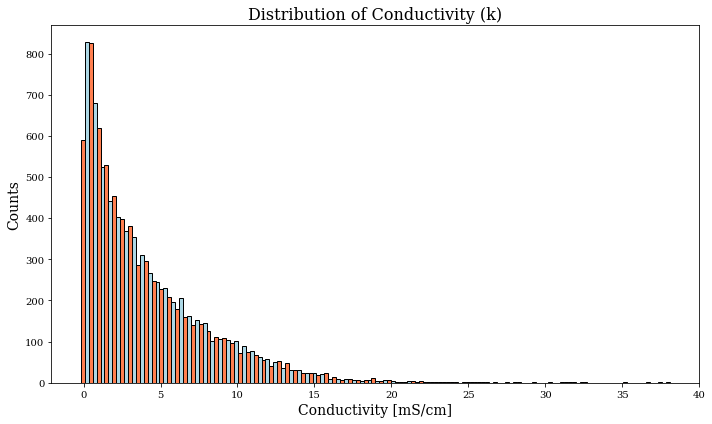

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'doi'  # Replace with your actual column name

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the histogram
num_bins = 150
n, bins, patches = plt.hist(dataset['k'], bins=num_bins, color='blue', edgecolor='black')

# Define colors for bars (alternating between red and blue)
colors = ['coral', 'lightblue'] * (num_bins // 2) + ['coral'] * (num_bins % 2)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# plt.xticks(rotation=45)
mpl.rcParams['font.family'] = 'serif'

# Set x-axis labels to be displayed diagonally
plt.xlabel('Conductivity [mS/cm]', fontsize=14)  # Rotation and alignment settings
plt.ylabel('Counts', fontsize=14)
plt.title(f'Distribution of Conductivity (k)', fontsize=16)

plt.tight_layout()  # Ensures that the labels fit properly in the figure
#plt.xlim(0, 5)
plt.savefig('conductivity_histogram_full.pdf', dpi=300, bbox_inches='tight')
plt.show()

## k > 15

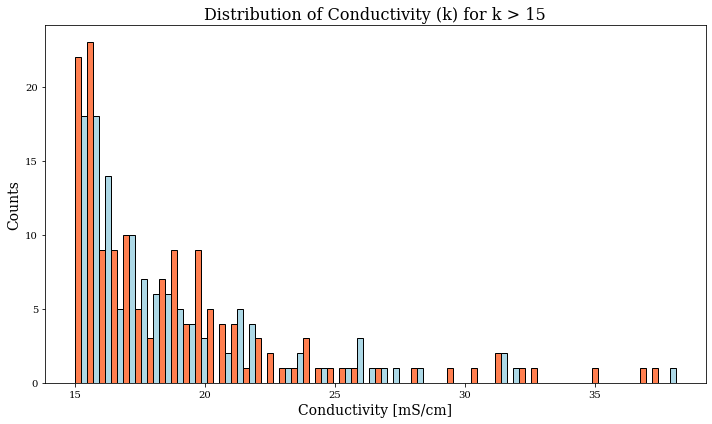

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'doi'  # Replace with your actual column name

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the histogram
num_bins = 100
n, bins, patches = plt.hist(dataset['k'][dataset['k']>15], bins=num_bins, color='blue', edgecolor='black')

# Define colors for bars (alternating between red and blue)
colors = ['coral', 'lightblue'] * (num_bins // 2) + ['coral'] * (num_bins % 2)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# plt.xticks(rotation=45)
mpl.rcParams['font.family'] = 'serif'

# Set x-axis labels to be displayed diagonally
plt.xlabel('Conductivity [mS/cm]', fontsize=14)  # Rotation and alignment settings
plt.ylabel('Counts', fontsize=14)
plt.title(f'Distribution of Conductivity (k) for k > 15', fontsize=16)

plt.tight_layout()  # Ensures that the labels fit properly in the figure
plt.savefig('conductivity_histogram_k_largerthan15.pdf', dpi=300, bbox_inches='tight')

plt.show()

## DOI Distributions

### More than 250 points

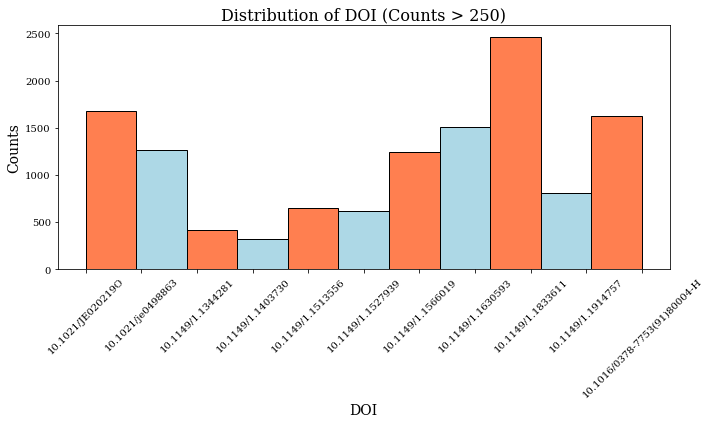

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'doi'  # Replace with your actual column name
threshold = 250

# Calculate the value counts for the column
value_counts = dataset[column_name].value_counts()

# Filter the values that occur less than the threshold
filtered_values = value_counts[value_counts > threshold]
filtered_df = dataset['doi'][dataset['doi'].isin(list(filtered_values.index))]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the histogram
num_bins = len(filtered_values)
n, bins, patches = plt.hist(filtered_df, bins=num_bins, color='blue', edgecolor='black')

# Define colors for bars (alternating between red and blue)
colors = ['coral', 'lightblue'] * (num_bins // 2) + ['coral'] * (num_bins % 2)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.xticks(rotation=45)

# Set x-axis labels to be displayed diagonally
plt.xlabel('DOI', fontsize=14)  # Rotation and alignment settings

plt.ylabel('Counts', fontsize=14)
plt.title(f'Distribution of DOI (Counts > {threshold})', fontsize=16)

plt.tight_layout()  # Ensures that the labels fit properly in the figure
plt.savefig('doi_histogram_countlargerthan250.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [41]:
np.sum(n)

12614.0

In [43]:
12614.0+1211.0

13825.0

In [42]:
12614.0/(12614.0+1211.0)

0.9124050632911392

### Less than 250 points

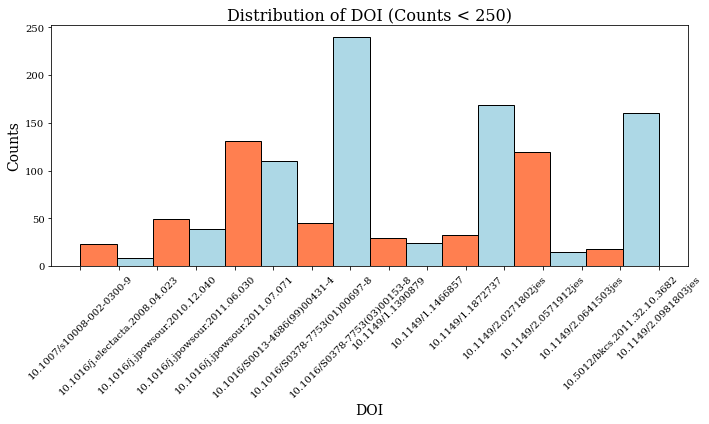

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'doi'  # Replace with your actual column name
threshold = 250

# Calculate the value counts for the column
value_counts = dataset[column_name].value_counts()

# Filter the values that occur less than the threshold
filtered_values = value_counts[value_counts < threshold]
filtered_df = dataset['doi'][dataset['doi'].isin(list(filtered_values.index))]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the histogram
num_bins = len(filtered_values)
n, bins, patches = plt.hist(filtered_df, bins=num_bins, color='blue', edgecolor='black')

# Define colors for bars (alternating between red and blue)
colors = ['coral', 'lightblue'] * (num_bins // 2) + ['coral'] * (num_bins % 2)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.xticks(rotation=45)

# Set x-axis labels to be displayed diagonally
plt.xlabel('DOI', fontsize=14)  # Rotation and alignment settings

plt.ylabel('Counts', fontsize=14)
plt.title(f'Distribution of DOI (Counts < {threshold})', fontsize=16)

plt.tight_layout()  # Ensures that the labels fit properly in the figure
plt.savefig('doi_histogram_countlessthan250.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [39]:
np.sum(n)

1211.0

## Temperature Distribution

### Counts < 200

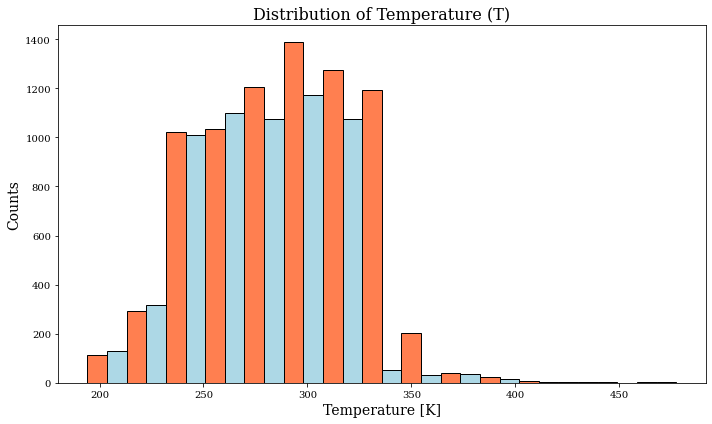

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'T'  # Replace with your actual column name

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the histogram
num_bins = 30
n, bins, patches = plt.hist(dataset['T'], bins=num_bins, color='lightblue', edgecolor='black')

# Define colors for bars (alternating between red and blue)
colors = ['coral', 'lightblue'] * (num_bins // 2) + ['coral'] * (num_bins % 2)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# plt.xticks(rotation=45)

# Set x-axis labels to be displayed diagonally
plt.xlabel('Temperature [K]', fontsize=14)  # Rotation and alignment settings
plt.ylabel('Counts', fontsize=14)
plt.title(f'Distribution of Temperature (T)', fontsize=16)

plt.tight_layout()  # Ensures that the labels fit properly in the figure
plt.savefig('temperature_histogram.pdf', dpi=300, bbox_inches='tight')

plt.show()

## Concentration Distribution

In [25]:
dataset.columns

Index(['doi', 'k', 'T', 'c', 'salt', 'c units', 'solvent ratio type', 'EC',
       'PC', 'DMC', 'EMC', 'DEC', 'DME', 'DMSO', 'AN', 'MOEMC', 'TFP', 'EA',
       'MA', 'FEC', 'DOL', '2-MeTHF', 'DMM', 'Freon 11', 'Methylene chloride',
       'THF', 'Toluene', 'Sulfolane', '2-Glyme', '3-Glyme', '4-Glyme',
       '3-Me-2-Oxazolidinone', '3-MeSulfolane', 'Ethyldiglyme', 'DMF',
       'Ethylbenzene', 'Ethylmonoglyme', 'Benzene', 'g-Butyrolactone',
       'Cumene', 'Propylsulfone', 'Pseudocumeme', 'TEOS', 'm-Xylene',
       'o-Xylene'],
      dtype='object')

### Mol/kg data points

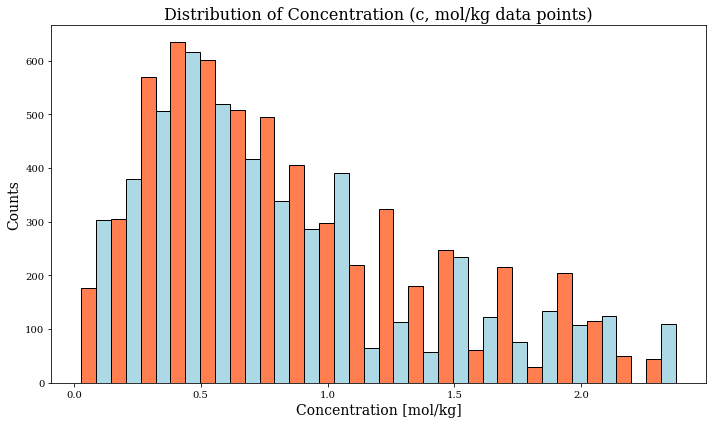

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'c'  # Replace with your actual column name

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the histogram
num_bins = 40
n, bins, patches = plt.hist(dataset['c'][dataset['c units']=='mol/kg'], bins=num_bins, color='lightblue', edgecolor='black')

# Define colors for bars (alternating between red and blue)
colors = ['coral', 'lightblue'] * (num_bins // 2) + ['coral'] * (num_bins % 2)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# plt.xticks(rotation=45)

# Set x-axis labels to be displayed diagonally
plt.xlabel('Concentration [mol/kg]', fontsize=14)  # Rotation and alignment settings
plt.ylabel('Counts', fontsize=14)
plt.title(f'Distribution of Concentration (c, mol/kg data points)', fontsize=16)

plt.tight_layout()  # Ensures that the labels fit properly in the figure
plt.savefig('concentration_histogram_molkg.pdf', dpi=300, bbox_inches='tight')

plt.show()

### Mol/l data points

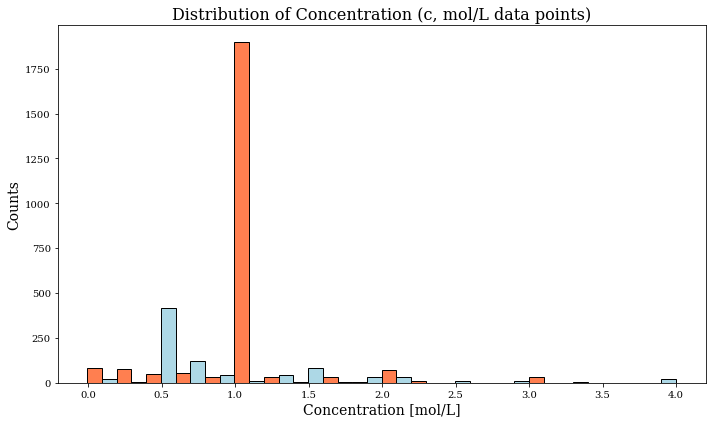

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'c'  # Replace with your actual column name

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the histogram
num_bins = 40
n, bins, patches = plt.hist(dataset['c'][dataset['c units']=='mol/l'], bins=num_bins, color='lightblue', edgecolor='black')

# Define colors for bars (alternating between red and blue)
colors = ['coral', 'lightblue'] * (num_bins // 2) + ['coral'] * (num_bins % 2)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# plt.xticks(rotation=45)

# Set x-axis labels to be displayed diagonally
plt.xlabel('Concentration [mol/L]', fontsize=14)  # Rotation and alignment settings
plt.ylabel('Counts', fontsize=14)
plt.title(f'Distribution of Concentration (c, mol/L data points)', fontsize=16)

plt.tight_layout()  # Ensures that the labels fit properly in the figure
plt.savefig('concentration_histogram_molL.pdf', dpi=300, bbox_inches='tight')

plt.show()

## Salt Distribution

## All Salts in one plot

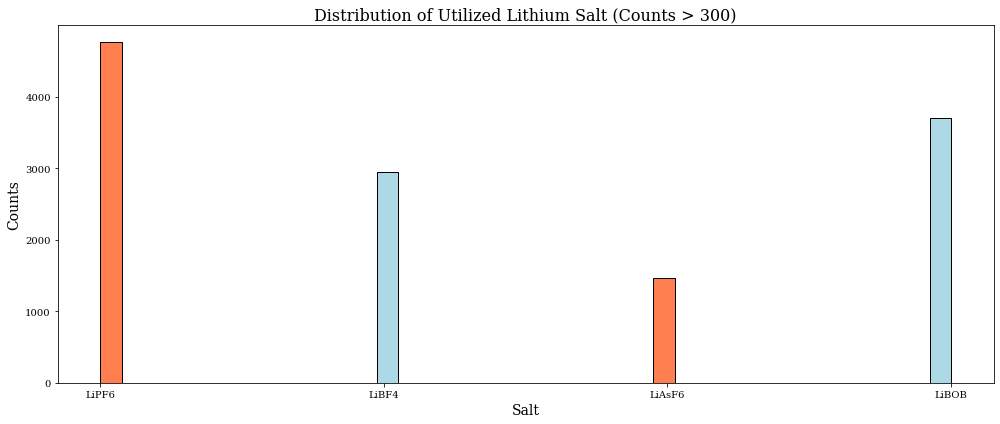

In [311]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'salt'  # Replace with your actual column name
threshold = 300

# Calculate the value counts for the column
value_counts = dataset[column_name].value_counts()

# Filter the values that occur less than the threshold
filtered_values = value_counts[value_counts > threshold]
filtered_df = dataset['salt'][dataset['salt'].isin(list(filtered_values.index))]

plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

# Create the histogram
num_bins = 40
n, bins, patches = plt.hist(filtered_df, bins=num_bins, color='lightblue', edgecolor='black')

# Define colors for bars (alternating between red and blue)
colors = ['coral', 'lightblue'] * (num_bins // 2) + ['coral'] * (num_bins % 2)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# plt.xticks(rotation=45)

# Set x-axis labels to be displayed diagonally
plt.xlabel('Salt', fontsize=14)  # Rotation and alignment settings
plt.ylabel('Counts', fontsize=14)
plt.title(f'Distribution of Utilized Lithium Salt (Counts > 300)', fontsize=16)

plt.tight_layout()  # Ensures that the labels fit properly in the figure
plt.savefig('salt_histogram_countslargerthan300.pdf', dpi=300, bbox_inches='tight')

plt.show()

### Salt Counts below 300

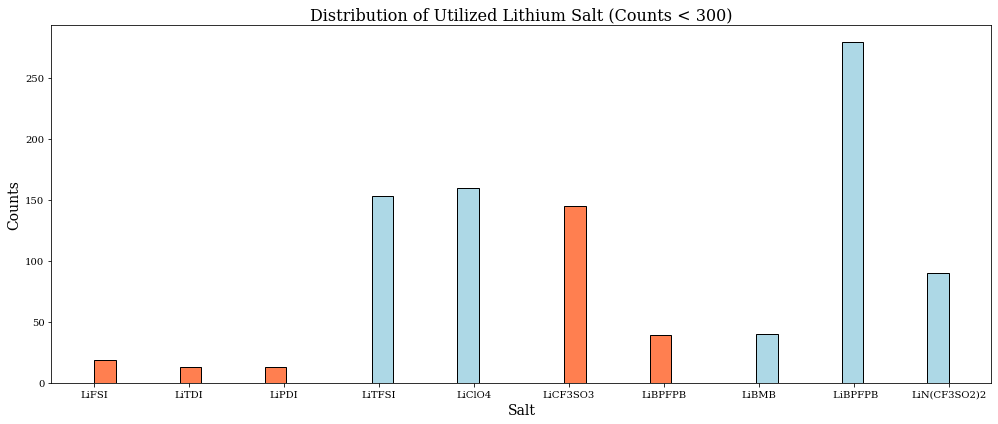

In [312]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'salt'  # Replace with your actual column name
threshold = 300

# Calculate the value counts for the column
value_counts = dataset[column_name].value_counts()

# Filter the values that occur less than the threshold
filtered_values = value_counts[value_counts < threshold]
filtered_df = dataset['salt'][dataset['salt'].isin(list(filtered_values.index))]

plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

# Create the histogram
num_bins = 40
n, bins, patches = plt.hist(filtered_df, bins=num_bins, color='lightblue', edgecolor='black')

# Define colors for bars (alternating between red and blue)
colors = ['coral', 'lightblue'] * (num_bins // 2) + ['coral'] * (num_bins % 2)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# plt.xticks(rotation=45)

# Set x-axis labels to be displayed diagonally
plt.xlabel('Salt', fontsize=14)  # Rotation and alignment settings
plt.ylabel('Counts', fontsize=14)
plt.title(f'Distribution of Utilized Lithium Salt (Counts < 300)', fontsize=16)

plt.tight_layout()  # Ensures that the labels fit properly in the figure
plt.savefig('salt_histogram_countslessthan300.pdf', dpi=300, bbox_inches='tight')

plt.show()

## Solvent ratio type distribution

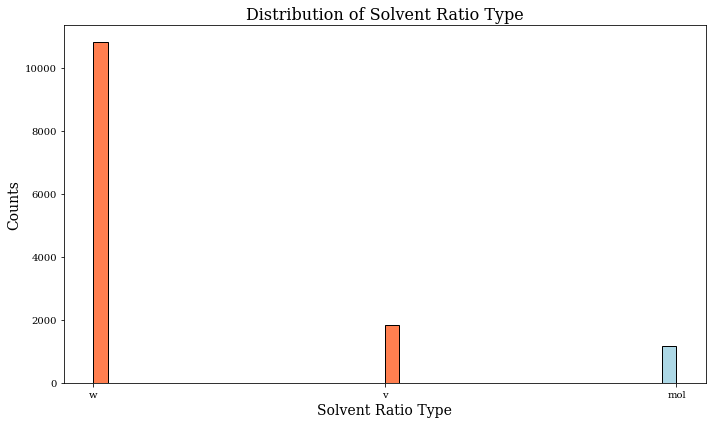

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'c'  # Replace with your actual column name

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the histogram
num_bins = 40
n, bins, patches = plt.hist(dataset['solvent ratio type'], bins=num_bins, color='lightblue', edgecolor='black')

# Define colors for bars (alternating between red and blue)
colors = ['coral', 'lightblue'] * (num_bins // 2) + ['coral'] * (num_bins % 2)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# plt.xticks(rotation=45)

# Set x-axis labels to be displayed diagonally
plt.xlabel('Solvent Ratio Type', fontsize=14)  # Rotation and alignment settings
plt.ylabel('Counts', fontsize=14)
plt.title(f'Distribution of Solvent Ratio Type', fontsize=16)

plt.tight_layout()  # Ensures that the labels fit properly in the figure
plt.savefig('solventratiotype_histogram.pdf', dpi=300, bbox_inches='tight')

plt.show()

## Correlation - Conductivity and Temperature

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


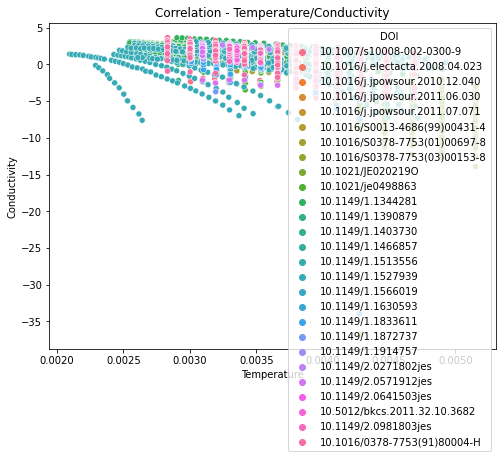

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the two columns you want to correlate
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size

logk_col = pd.DataFrame(np.log(dataset['k']))
inv_t_col = pd.DataFrame(dataset['T'].apply(lambda x: 1/x if x != 0 else np.nan))

# Assuming 'doi' is the column you want to use as the hue
doi_col = dataset['doi']

df_con = pd.concat([logk_col, inv_t_col, doi_col], axis=1)
df_con.columns = ['logk', 'inv_T', 'doi']

sns.scatterplot(data=df_con, x='inv_T', y='logk', hue='doi')  # Add 'hue' parameter

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Conductivity')
plt.title('Correlation - Temperature/Conductivity')

# Show the plot
plt.legend(title='DOI')  # Optional: Add a legend with a title
plt.show()

In [13]:
dataset['k']

0 0.160643
1 0.150856
2 0.141666
3 0.132277
4 0.119348
 ... 
13820 8.510000
13821 2.530000
13822 4.290000
13823 10.790000
13824 1.640000
Name: k, Length: 13825, dtype: float64

In [35]:
column_name = 'salt'

# Count the number of observations below 15
below_15_count = len(dataset[dataset[column_name] == 'LiBOB'])

# Calculate the total number of observations in the column
total_count = len(dataset)

# Calculate the percentage
percentage_below_15 = (below_15_count / total_count) * 100
print(percentage_below_15)

26.755877034358043


In [36]:
34.43+21.345+10.58+26.75

93.105